# ANALIZAR LA CORRELACIÓN ENTRE EL NIVEL EDUCATIVO PARENTAL Y LA PREPARACIÓN PREVIA PARA EXÁMENES EN ESTUDIANTES DE 5º Y 6º GRADO, CONSIDERANDO EL TIPO DE ALMUERZO COMO FACTOR CLAVE EN ESTUDIANTES CON PADRES DE MENOR FORMACION EDUCATIVA.


*__Ricardo Quintero, Diego Aguilar__*


## **INTRODUCCIÓN**

In [215]:
### para exportar pdf sin celdas de codigo, ejecutar en el cmd del sistema:

## cd C:\Users\User\Desktop\PROYECTO COMPU 1

### python -m jupyter nbconvert --to pdf --no-input jupyter.ipynb

En este informe se busca realizar el estudio de la relación que existe entre el nivel educativo parental de los estudiantes y la preparación previa que estos poseen antes de un examen. Para ello, se analizarán las estadísticas descriptivas de cada una de las variables y posteriormente se medirá la fuerza de relación de estas variables (mediante visualización de tablas y gráficos) para observar que tan fuerte es esta correlación. Además, como la categoria "Algun estudio de secundaria" de la variable "Nivel educativo de los padres" se considera como valor atipico porque no sigue el comportamiento esperado, se analiza bidimensionalmente con la variable "Almuerzo", donde se determina si el tipo de almuerzo puede influir en esta categoria sobre si los estudiantes tienden más a completar o no la preparacion previa al examen.

## **Primeras 5 filas de la base de datos:**

In [309]:
#leer la base de datos en formato csv 
import pandas as pd

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_

csv = ('https://raw.githubusercontent.com/Rickfer14/StudentsPerformance-G5-G6-Grupo-5/refs/heads/main/Rendi'
'miento%20de%20los%20estudiantes%20de%205to%20y%206to%20grado.csv')
df = pd.read_csv(csv)

df = df.drop(columns=['Raza', 'Nota en matemáticas', 'Nota en lectura', 'Nota en escritura', 'Nota', 'Género'])
df['Almuerzo'] = df['Almuerzo'].replace({'Gratis/Reducido': 'Gratis'})

#mostrar primeras 5 filas del csv
df.head(5)

,Nivel educativo de los padres,Almuerzo,Preparación,Promedio
0,Licenciatura,Estándar,Ninguna,72.67
1,Algun estudio universitario,Estándar,Completada,82.33
2,Título de maestría,Estándar,Ninguna,92.67
3,Título de asociado,Gratis,Ninguna,49.33
4,Algun estudio universitario,Estándar,Ninguna,76.33


## **Tabla bivariante**

En la siguiente tabla, se muestran la cantidad de estudiantes que completaron (o no) la preparación previa al examen, según el nivel educativo de los padres de los estudiantes.

- Cómo análisis general, se puede observar que los estudiantes tienden más a no completar el curso que si hacerlo. Concretamente, 64,2% de los estudiantes son quienes no completan el curso.

- La clase más frecuente, respecto a los estudiantes que completaron el curso, es la categoría "Título de asociado", representando a 82 de los 358 estudiantes pertenecientes a este nivel educativo parental.

- Si bien, los estudiantes de la categoría "Título de maestría" son quienes menos tienen esta prepración completada, puede deberse a la poca cantidad de estudiantes que poseen padres en esta categoría, siendo esta la menos frecuente con solo 59 estudiantes.

In [281]:
tabla = pd.crosstab(df['Nivel educativo de los padres'], 
        df['Preparación'],
         margins=False,
         margins_name='Total'
)

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd._repr_latex_ = _repr_latex_

tabla


Preparación,Completada,Ninguna
Nivel educativo de los padres,,
Algun estudio de secundaria,77,102
Algun estudio universitario,77,149
Escuela secundaria,56,140
Licenciatura,46,72
Título de asociado,82,140
Título de maestría,20,39


- Sin embargo, para una mejor interpretación y visualización de los datos, se presenta el siguiente gráfico de barras:

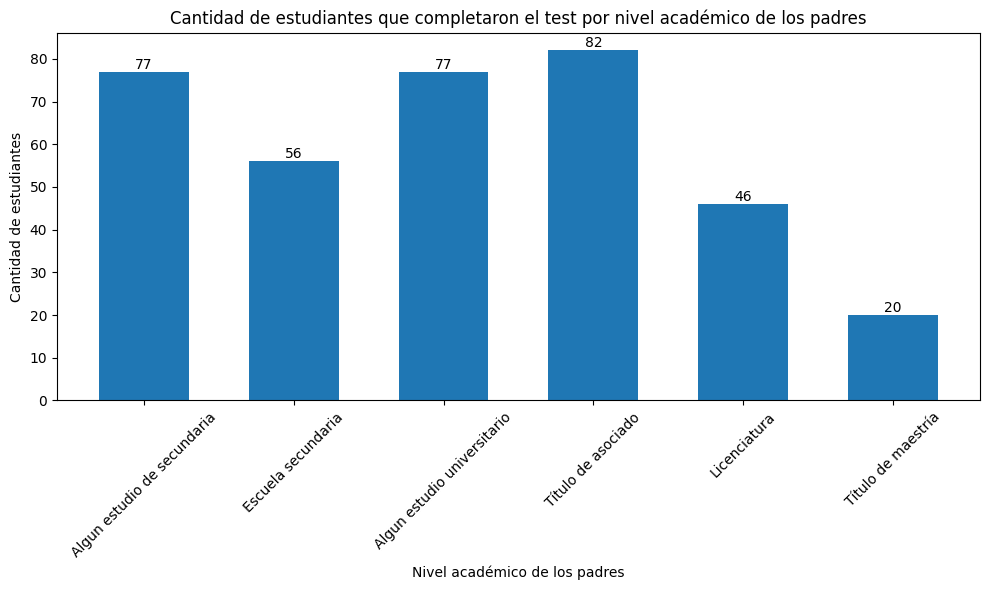

In [263]:
#filtrar a los estudiantes que solo hayan completado la preparacion
filtro_curso = df[df['Preparación'] == 'Completada']

#separar en grupos a los estudiantes hayan completado la preparacion
# por el nivel educativo de los padres 
filtro_curso1 = filtro_curso.groupby('Nivel educativo de los padres').size()

#niveles educativos ordenados
filtro_curso1_ordenado = filtro_curso1.reindex([
    "Algun estudio de secundaria",
    "Escuela secundaria",
    "Algun estudio universitario",
    "Título de asociado",
    "Licenciatura",
    "Título de maestría",
])
etiquetas = filtro_curso1_ordenado.index
valores = filtro_curso1_ordenado.values

# --crear grafico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
grafico = plt.bar(etiquetas, valores,width=0.6)
plt.bar_label(grafico, labels=valores)

# Añadir etiquetas y título
plt.title('Cantidad de estudiantes que completaron el '
           'test por nivel académico de los padres')
plt.xlabel('Nivel académico de los padres')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)

#Mostrar el grafico
plt.tight_layout()
plt.show()

Se observan las frecuencias de los estudiantes que completaron el curso según el nivel académico de los padres. Ademas, el porcentaje de estudiantes que lo completaron, por nivel academico parental es el siguiente:



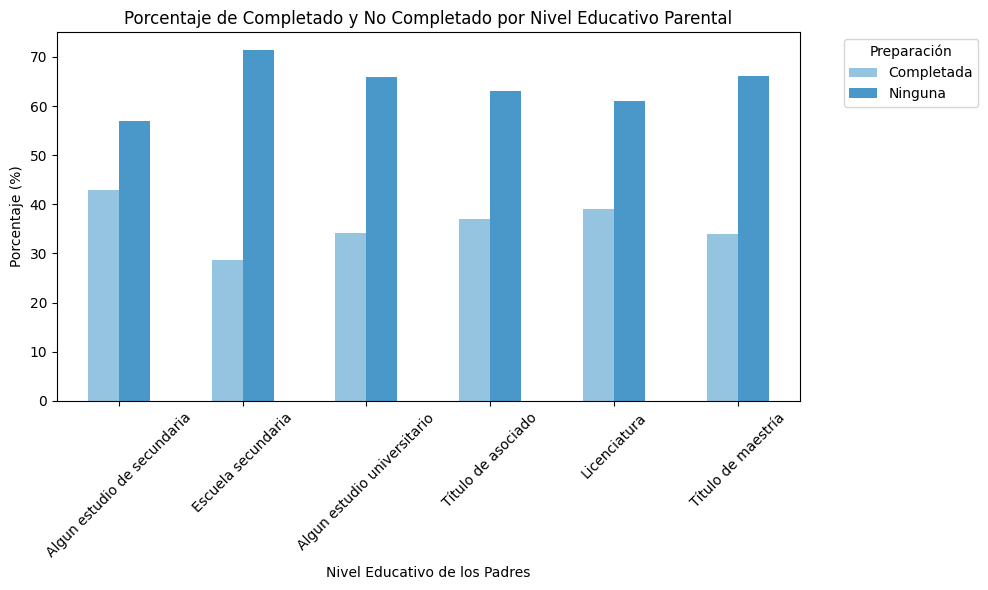

In [268]:
#Tabla con porcentajes
tabla_porcentajes = tabla.div(tabla.sum(axis=1), axis=0) * 100
tabla_porcentajes = tabla_porcentajes.reindex([
    "Algun estudio de secundaria",
    "Escuela secundaria",
    "Algun estudio universitario",
    "Título de asociado",
    "Licenciatura",
    "Título de maestría",
])
#Crear grafico
colors = plt.cm.Blues([0.4, 0.6])
tabla_porcentajes.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)

# Añadir etiquetas y título
plt.title('Porcentaje de Completado y No Completado por Nivel Educativo Parental')
plt.xlabel('Nivel Educativo de los Padres')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.legend(title='Preparación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Con los datos extraidos de la siguiente tabla:

In [291]:
tabla_porcentajes_redondeado = tabla_porcentajes.round(2).reindex([
    "Algun estudio de secundaria",
    "Escuela secundaria",
    "Algun estudio universitario",
    "Título de asociado",
    "Licenciatura",
    "Título de maestría",
])
tabla_porcentajes_redondeado

Preparación,Completada,Ninguna
Nivel educativo de los padres,,
Algun estudio de secundaria,43.02,56.98
Escuela secundaria,28.57,71.43
Algun estudio universitario,34.07,65.93
Título de asociado,36.94,63.06
Licenciatura,38.98,61.02
Título de maestría,33.90,66.10


Viendo esto, se puede apreciar que, por ejemplo, los estudiantes con padres de educación escuela secundaria completan la preparación aproximadamente un 28.57%, contra los estudiantes con padres con titulo de maestría, que lo completan, en promedio, 33.89% de los estudiantes. Esto sirve para visualizar de mejor manera la proporción con la que cada clase tiende a completar la preparación previa, ya que los números crudos podrian parecer engañosos.

## **Preparación previa y su influencia en las notas de los estudiantes, según el nivel educativo parental**

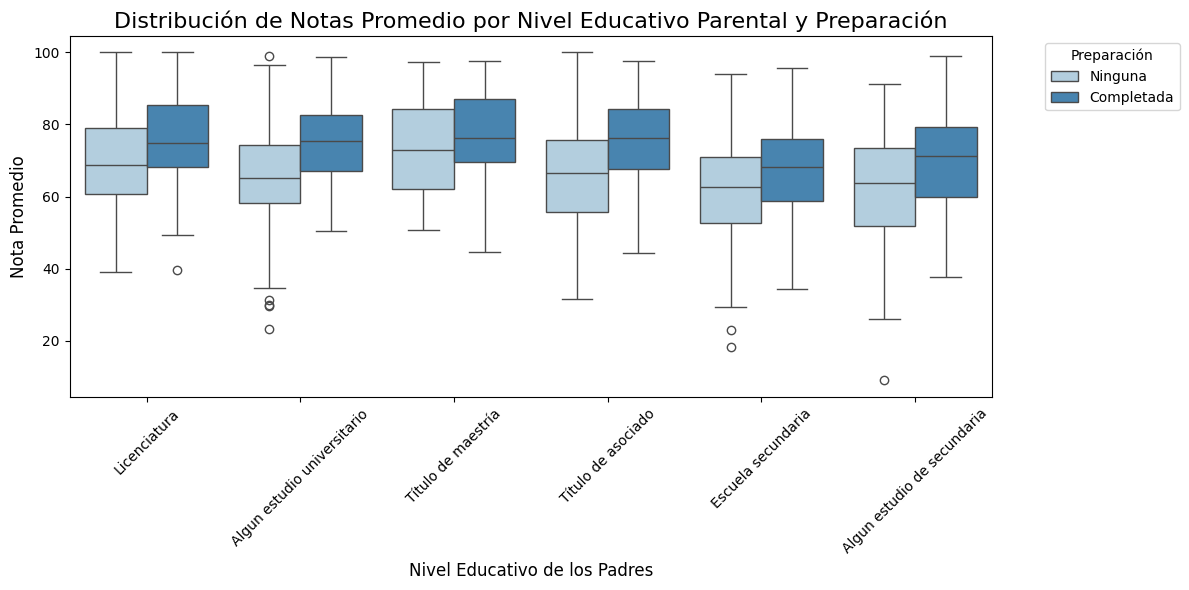

In [364]:
import seaborn as sns

orden_jerarquico = [
    'Algun estudio de secundaria',
    'Escuela secundaria',
    'Algun estudio universitario',
    'Título de asociado',
    'Licenciatura',
    'Título de maestría',
]

# Creando el grafico
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Nivel educativo de los padres',
    y='Promedio',
    hue='Preparación',
    data=df,
    palette='Blues'
)

# Añadir etiquetas y título
plt.title('Distribución de Notas Promedio por Nivel Educativo Parental y Preparación', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=12)
plt.ylabel('Nota Promedio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title='Preparación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout
plt.tight_layout()

Se pueden observar las distintas categorias de los niveles educativos parentales, con dos subcategorías (Preparación: Completada ó Ninguna), por las notas promedio de cada una. 

- Analizando la distribución se observa que, en efecto, aquellos estudiantes que completan la preparación se encuentran en un rango de notas promedio por encima de aquellos que no.

- Mediante el patrón de las cajas de la preparación completada, se puede visualizar la tendencia a encontrarse un poco más arriba respecto al promedio de notas, según el nivel educativo parental es más alto. Esto indica que los estudiantes con padres de mayor nivel parental, además de tender a realizar, en promedio, más preparaciones previas, tambien aumentan las notas de los mismos.

- Esto se refuerza observando los bigotes de las cajas, donde a menor nivel educativo parental, se presencian más valores atípicos y tambien el alargamiento de dichos bigotes a un promedio menor.

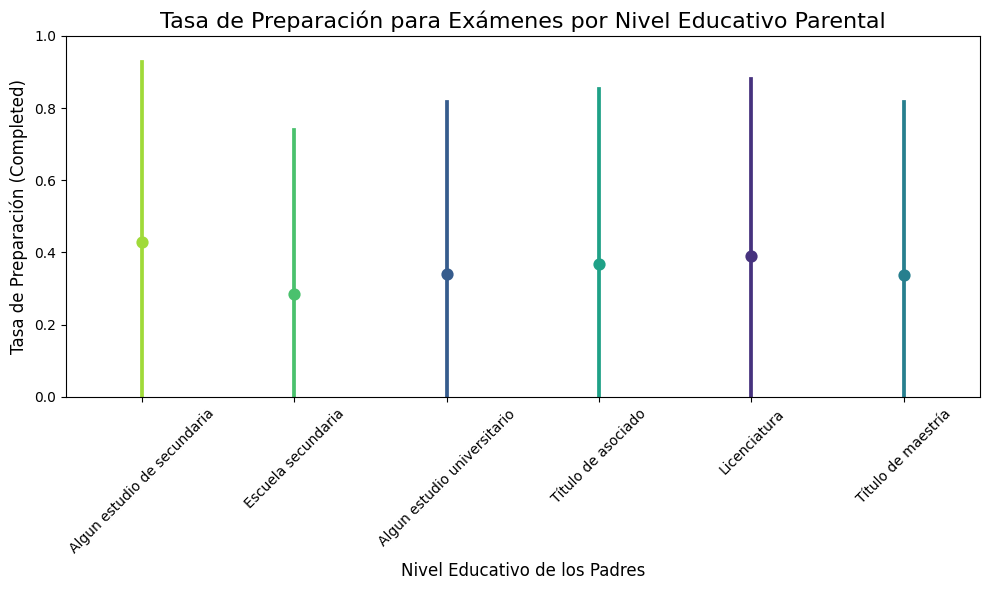

In [ ]:

# Crear el gráfico de puntos
df['Preparación_binaria'] = df['Preparación'].map({'Completada': 1, 'Ninguna': 0})
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='Nivel educativo de los padres',
    y='Preparación_binaria',
    hue='Nivel educativo de los padres',
    data=df,
    order=orden_jerarquico,
    palette='viridis',
    errorbar='sd',
    legend=False
)

# Añadir etiquetas y título
plt.title('Tasa de Preparación para Exámenes por Nivel Educativo Parental', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=12)
plt.ylabel('Tasa de Preparación (Completed)', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()